In [ ]:
# A brief about dataset

In [ ]:
'''
Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater 
effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank 
performed and identify the patterns that will help us find conclusions in order to develop future strategies.

The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in 
order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.
'''

In [ ]:
# Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# Loading dataset

In [2]:
bank=pd.read_csv("C://Users//acer//Desktop//1sem//python//bank-marketing-campaigns-dataset//bank.csv")

In [ ]:
# Looking at first few rows 

In [3]:
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Looking at last few rows

In [4]:
bank.tail(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
# Looking at all columns

In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# shape of dataset

In [7]:
bank.shape

(41188, 21)

In [ ]:
# Looking at all column types

In [8]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
# Looking at basic stats value

In [9]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Lets change columns name for easy retrieval of info

In [3]:
bank.rename(columns={"y":"target"},inplace=True)

In [14]:
bank.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
target             object
dtype: object

In [19]:
bank.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [30]:
bank.target.unique()

array(['no', 'yes'], dtype=object)

In [29]:
bank.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [28]:
bank.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [27]:
bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [25]:
bank.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [24]:
bank.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [23]:
bank.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [22]:
bank.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [21]:
bank.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [20]:
bank.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
# Feature engineering

In [16]:
bank.job.value_counts().sort_values(ascending=False)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
# applying one hot encoding on this col

In [5]:
job=pd.get_dummies(bank["job"],prefix="job_",drop_first=True)

In [ ]:
# concating job with the original dataset

In [13]:
job_df=pd.DataFrame(job,columns=job.columns)

In [17]:
bank=pd.concat([job_df,bank],axis=1)

In [18]:
bank.head(2)

,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,0,0,1,0,0,0,0,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,0,0,0,0,0,0,1,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# removing the columns job from bank dataset

In [20]:
bank.drop("job",axis=1,inplace=True)

In [ ]:
# lets look at the dataset after altering all these

In [21]:
bank.head(2)

,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,0,0,1,0,0,0,0,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,0,0,0,0,0,0,1,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Lets look another categorical column "Target"

In [23]:
bank.target.value_counts().sort_values(ascending=False)

no     36548
yes     4640
Name: target, dtype: int64

In [ ]:
# we can apply Label encoding here as we have only 2 values

In [ ]:
a={"no":0,"yes":1}
bank.target=[a[item] for item in bank.target]

In [ ]:
# Lets look at the dataset

In [25]:
bank.head(2)

,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,0,0,1,0,0,0,0,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
# Lets look at another categorical column "poutcome"

In [26]:
bank.poutcome.value_counts().sort_values(ascending=False)

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
# as we have 3 distict value under this catwgorical feature we can apply One hot encoding 

In [29]:
pout=pd.get_dummies(bank["poutcome"],prefix="poutcome_",drop_first=True)

In [ ]:
#  converting pout into dataframe so that we can concat it into our main dataframe

In [30]:
pout_df=pd.DataFrame(pout,columns=pout.columns)

In [32]:
bank=pd.concat([pout_df,bank],axis=1)

In [ ]:
# Lets look at the dataset

In [33]:
bank.head(2)

,poutcome__nonexistent,poutcome__success,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,1,0,0,0,1,0,0,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,1,0,0,0,0,0,0,0,1,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
# Deleting poutcome columns from bank dateset

In [36]:
bank.drop("poutcome",axis=1,inplace=True)

In [ ]:
# Look at the shape of dataset

In [37]:
bank.shape

(41188, 32)

In [ ]:
# lets take another categorical column "day_of_week"

In [38]:
bank.day_of_week.value_counts().sort_values(ascending=False)

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
# As we have 5 distinct values we can apply one hot encoding

In [39]:
day=pd.get_dummies(bank["day_of_week"],prefix="day_",drop_first=True)

In [ ]:
# converting it to dataframe

In [40]:
day_df=pd.DataFrame(day,columns=day.columns)

In [ ]:
# concating with bank dataset

In [41]:
bank=pd.concat([day_df,bank],axis=1)

In [42]:
bank.head(2)

,day__mon,day__thu,day__tue,day__wed,poutcome__nonexistent,poutcome__success,job__blue-collar,job__entrepreneur,job__housemaid,job__management,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,1,0,0,0,1,0,0,0,1,0,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,1,0,0,0,1,0,0,0,0,0,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
# deleting "day_of_week" column from dataset

In [45]:
bank.drop("day_of_week",axis=1,inplace=True)

In [ ]:
# Lets look at the shape

In [46]:
bank.shape

(41188, 35)

In [ ]:
# Taking another categorical feature

In [47]:
bank.month.value_counts().sort_values(ascending=True)

dec      182
mar      546
sep      570
oct      718
apr     2632
nov     4101
jun     5318
aug     6178
jul     7174
may    13769
Name: month, dtype: int64

In [ ]:
# here also we can apply one hot encoding

In [48]:
mon=pd.get_dummies(bank["month"],prefix="month_",drop_first=True)

In [ ]:
# converting to dataframe

In [49]:
mon_df=pd.DataFrame(mon,columns=mon.columns)

In [ ]:
# concating with original dataset

In [50]:
bank=pd.concat([bank,mon_df],axis=1)

In [ ]:
# Looking at the dataset

In [51]:
bank.head(1)

,day__mon,day__thu,day__tue,day__wed,poutcome__nonexistent,poutcome__success,job__blue-collar,job__entrepreneur,job__housemaid,job__management,...,target,month__aug,month__dec,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# deleting month column from dataset

In [53]:
bank.drop("month",axis=1,inplace=True)

In [ ]:
# As we have all other left categorical columns with less distinct values, we can apply one hot encoding to all columns at a time

In [57]:
cat_feats=bank.select_dtypes(include=["object"]).columns.tolist()

In [59]:
bank=pd.get_dummies(bank,columns=cat_feats,drop_first=True)

In [61]:
bank.columns

Index(['day__mon', 'day__thu', 'day__tue', 'day__wed', 'poutcome__nonexistent',
       'poutcome__success', 'job__blue-collar', 'job__entrepreneur',
       'job__housemaid', 'job__management', 'job__retired',
       'job__self-employed', 'job__services', 'job__student',
       'job__technician', 'job__unemployed', 'job__unknown', 'age', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target', 'month__aug',
       'month__dec', 'month__jul', 'month__jun', 'month__mar', 'month__may',
       'month__nov', 'month__oct', 'month__sep', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       '

In [ ]:
# lets look at the shape of bank dataset

In [62]:
bank.shape

(41188, 54)

In [ ]:
# Lets look at the dataset

In [63]:
bank.head(2)

,day__mon,day__thu,day__tue,day__wed,poutcome__nonexistent,poutcome__success,job__blue-collar,job__entrepreneur,job__housemaid,job__management,...,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Data visualization

In [ ]:
# using countplot

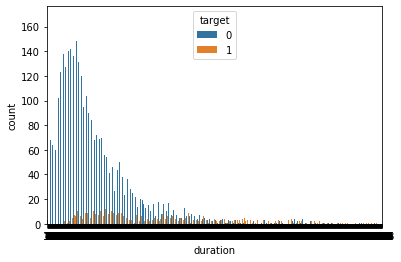

In [64]:
sns.countplot(x="duration",hue="target",data=bank)

In [ ]:
# using histogram

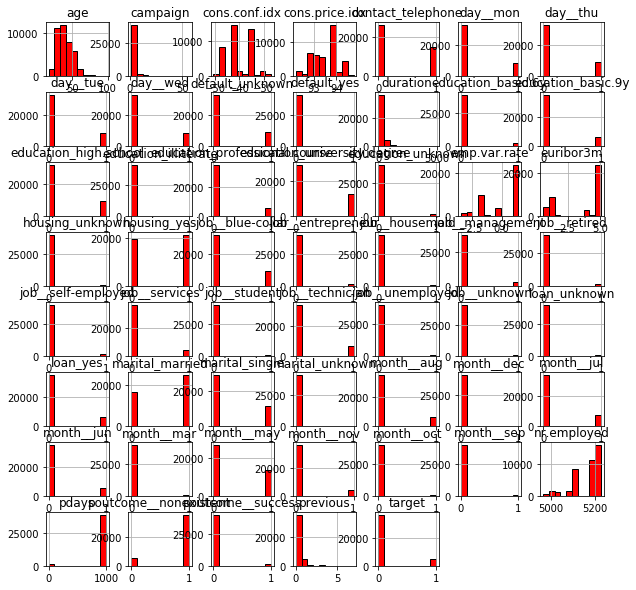

In [66]:
bank.hist(figsize=(10,10),color="red",edgecolor="black")
plt.show()

In [ ]:
# using scatter plot

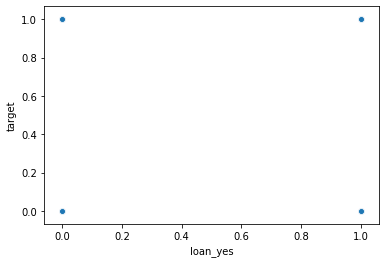

In [67]:
sns.scatterplot(x="loan_yes",y="target",data=bank)

In [ ]:
# using scatter matrix

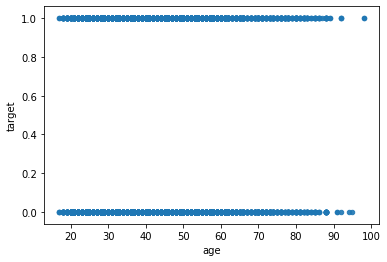

In [69]:
bank.plot(kind="scatter",x="age",y="target",alpha=0.9)

In [ ]:
# using heatmap

In [70]:
bank_corr=bank.corr()

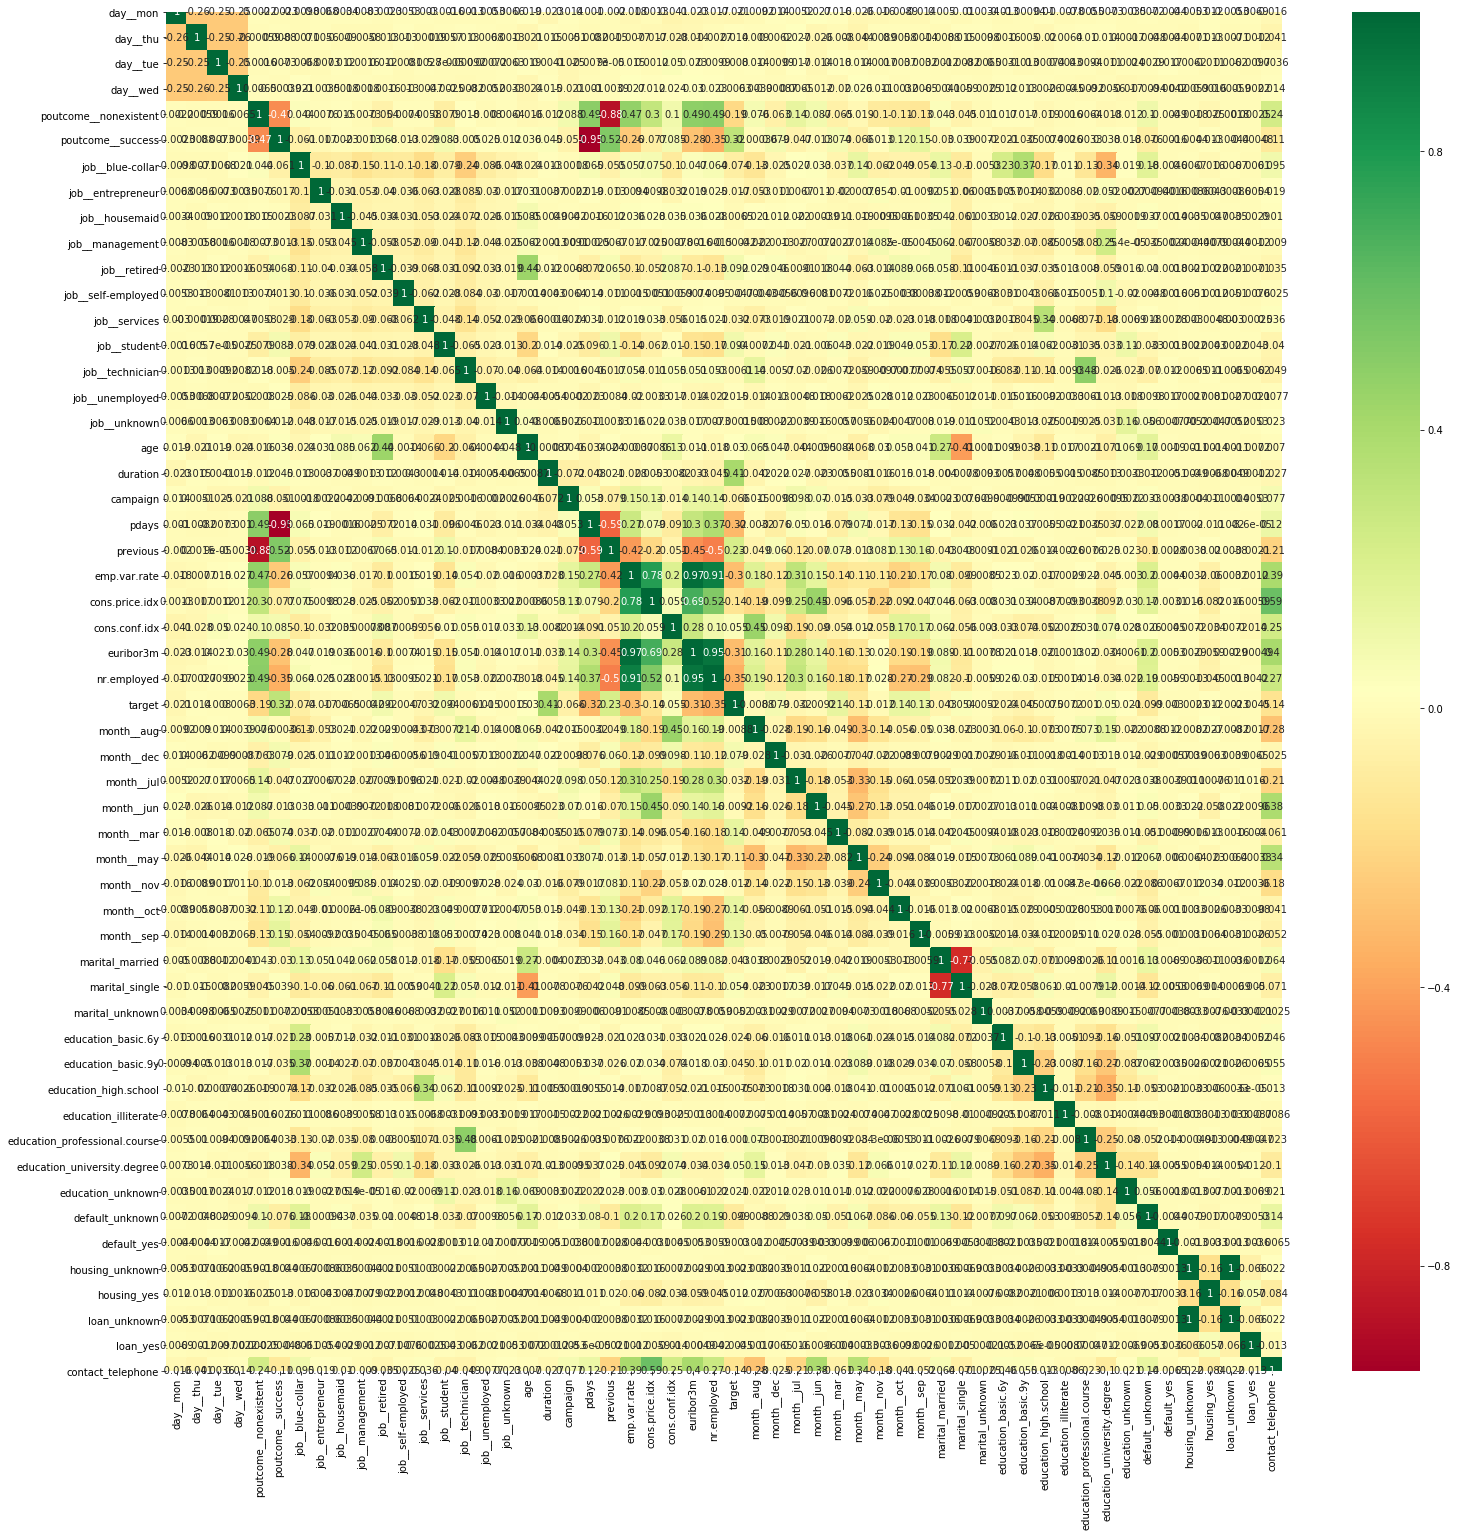

In [73]:
fig=plt.figure(figsize=(25,25))
sns.heatmap(bank_corr,annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# Lets look at the important features as we have many columns in our dataset

In [ ]:
# to find best features we need o divide our dataset into dependent and independent variables

In [76]:
y=bank["target"]
x=bank.drop("target",axis=1)

In [74]:
from sklearn.ensemble import ExtraTreesClassifier

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.43539854e-02 1.52486924e-02 1.30413844e-02 1.39193747e-02
 2.34646631e-02 1.83413517e-02 9.75990542e-03 5.54685373e-03
 4.38206263e-03 9.44993058e-03 8.22411033e-03 5.97303169e-03
 7.30110353e-03 5.63052318e-03 1.41431201e-02 5.56056050e-03
 2.44507333e-03 8.00293552e-02 2.40045272e-01 5.87319182e-02
 2.74064190e-02 1.45825501e-02 3.53751590e-02 2.96125400e-02
 1.48202634e-02 7.14474506e-02 3.96916078e-02 2.51203907e-03
 1.07196214e-03 3.49557773e-03 5.00012995e-03 6.54059845e-03
 6.00547287e-03 2.77496799e-03 5.40536190e-03 4.06629438e-03
 1.66738905e-02 1.49957232e-02 7.60259873e-04 6.00474423e-03
 1.09256947e-02 1.47929007e-02 2.28070002e-04 1.12210746e-02
 1.50299599e-02 6.78374642e-03 9.27440888e-03 2.32832240e-07
 3.36096699e-03 2.91116985e-02 3.09992390e-03 1.85464490e-02
 1.37895895e-02]


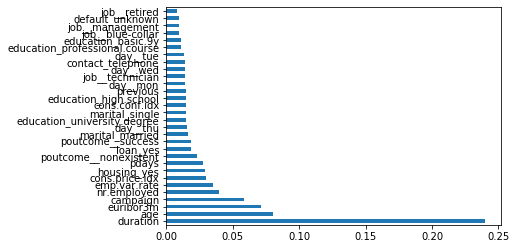

In [92]:
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [90]:
feat_importances.sort_values(ascending=False)

duration                         2.403695e-01
euribor3m                        8.572485e-02
age                              7.917385e-02
campaign                         5.689700e-02
pdays                            3.807495e-02
poutcome__success                3.634195e-02
nr.employed                      3.024252e-02
housing_yes                      2.843444e-02
emp.var.rate                     2.425950e-02
loan_yes                         1.900601e-02
day__thu                         1.685663e-02
marital_married                  1.647362e-02
cons.conf.idx                    1.619057e-02
education_university.degree      1.513992e-02
day__mon                         1.500148e-02
education_high.school            1.430277e-02
day__tue                         1.415483e-02
previous                         1.402256e-02
job__technician                  1.399607e-02
marital_single                   1.386783e-02
contact_telephone                1.370577e-02
day__wed                         1

In [ ]:
# though we can select best columns from this according to our requirement,but now we are taking all columns for preparing model

In [ ]:
# checking for null values

In [93]:
bank.isna().sum()

day__mon                         0
day__thu                         0
day__tue                         0
day__wed                         0
poutcome__nonexistent            0
poutcome__success                0
job__blue-collar                 0
job__entrepreneur                0
job__housemaid                   0
job__management                  0
job__retired                     0
job__self-employed               0
job__services                    0
job__student                     0
job__technician                  0
job__unemployed                  0
job__unknown                     0
age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
target                           0
month__aug          

In [ ]:
# Lets divide our dataset into training and test

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [95]:
print("size of x_train is:",x_train.shape)
print("size of y_train is:",y_train.shape)
print("size of x_test is:",x_test.shape)
print("size of y_test is:",y_test.shape)

size of x_train is: (28831, 53)
size of y_train is: (28831,)
size of x_test is: (12357, 53)
size of y_test is: (12357,)


In [ ]:
# Applying logistic regression

In [104]:
lr=LogisticRegression(solver="lbfgs",max_iter=1000)
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

In [105]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

       Actual  Predicted
32884       0          0
3169        0          0
32206       0          0
9403        0          0
14020       0          0
...       ...        ...
15908       0          0
28222       0          1
14194       0          0
19764       0          0
26052       0          0

[12357 rows x 2 columns]


In [109]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.9114671845917294
Kappa is : 0.4668059587476776
Sensitiviy is : 0.413966882649388
Precision is : 0.672514619883041
R2 score is: 0.11263829747011944
Area under curve is  :0.6942190357812951
array([[10688,   280],
       [  814,   575]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.93      0.97      0.95     10968\n'
 '           1       0.67      0.41      0.51      1389\n'
 '\n'
 '    accuracy                           0.91     12357\n'
 '   macro avg       0.80      0.69      0.73     12357\n'
 'weighted avg       0.90      0.91      0.90     12357\n')


In [ ]:
# applying decision tree

In [110]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=20)
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [111]:
output=pd.DataFrame({"Actual":y_test,"Predicted":y_test})
print(output)

       Actual  Predicted
32884       0          0
3169        0          0
32206       0          0
9403        0          0
14020       0          0
...       ...        ...
15908       0          0
28222       0          0
14194       0          0
19764       0          0
26052       0          0

[12357 rows x 2 columns]


In [ ]:
# Lets check accuracy of this model

In [112]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.8926114752771709
Kappa is : 0.4758312249413178
Sensitiviy is : 0.5529157667386609
Precision is : 0.5210312075983717
R2 score is: -0.07635190060068697
Area under curve is  :0.7442733465349032
array([[10262,   706],
       [  621,   768]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.94      0.94      0.94     10968\n'
 '           1       0.52      0.55      0.54      1389\n'
 '\n'
 '    accuracy                           0.89     12357\n'
 '   macro avg       0.73      0.74      0.74     12357\n'
 'weighted avg       0.90      0.89      0.89     12357\n')


In [ ]:
# Lets apply KNN

In [123]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [124]:
output=pd.DataFrame({"Actual":y_test,"Predicted":y_test})
print(output)

       Actual  Predicted
32884       0          0
3169        0          0
32206       0          0
9403        0          0
14020       0          0
...       ...        ...
15908       0          0
28222       0          0
14194       0          0
19764       0          0
26052       0          0

[12357 rows x 2 columns]


In [125]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.9029699765315206
Kappa is : 0.472076900669968
Sensitiviy is : 0.47804175665946724
Precision is : 0.5834797891036907
R2 score is: 0.027471040828768944
Area under curve is  :0.7174125632312653
array([[10494,   474],
       [  725,   664]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.94      0.96      0.95     10968\n'
 '           1       0.58      0.48      0.53      1389\n'
 '\n'
 '    accuracy                           0.90     12357\n'
 '   macro avg       0.76      0.72      0.74     12357\n'
 'weighted avg       0.90      0.90      0.90     12357\n')


In [ ]:
# Lets apply random forest

In [126]:
rf=RandomForestClassifier(criterion="entropy",max_depth=20,n_estimators=100)
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

In [127]:
output=pd.DataFrame({"Actual":y_test,"Predicted":y_test})
print(output)

       Actual  Predicted
32884       0          0
3169        0          0
32206       0          0
9403        0          0
14020       0          0
...       ...        ...
15908       0          0
28222       0          0
14194       0          0
19764       0          0
26052       0          0

[12357 rows x 2 columns]


In [128]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.913814032532168
Kappa is : 0.495613341677813
Sensitiviy is : 0.4521238300935925
Precision is : 0.6738197424892703
R2 score is: 0.1361606826377305
Area under curve is  :0.7122034175996774
array([[10664,   304],
       [  761,   628]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.93      0.97      0.95     10968\n'
 '           1       0.67      0.45      0.54      1389\n'
 '\n'
 '    accuracy                           0.91     12357\n'
 '   macro avg       0.80      0.71      0.75     12357\n'
 'weighted avg       0.90      0.91      0.91     12357\n')


In [ ]:
# Hence we can conclude that by applying random forest we get the bast accuracy of 91.38